In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [4]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


# Initiales Netz mit 1 Hidden Layer

activation = relu
loss = categorial_crossentropy
optimizer = adam

Epoch 1/20
680/680 [==============================] - 5s 6ms/step - loss: 1.9125 - accuracy: 0.5741 - val_loss: 1.1668 - val_accuracy: 0.7042
Epoch 2/20
680/680 [==============================] - 4s 7ms/step - loss: 0.9278 - accuracy: 0.8226 - val_loss: 0.9013 - val_accuracy: 0.7781
Epoch 3/20
680/680 [==============================] - 4s 5ms/step - loss: 0.7323 - accuracy: 0.8631 - val_loss: 0.7967 - val_accuracy: 0.8143
Epoch 4/20
680/680 [==============================] - 4s 6ms/step - loss: 0.6472 - accuracy: 0.8796 - val_loss: 0.7545 - val_accuracy: 0.8298
Epoch 5/20
680/680 [==============================] - 4s 6ms/step - loss: 0.5897 - accuracy: 0.8907 - val_loss: 0.7625 - val_accuracy: 0.8203
Epoch 6/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5497 - accuracy: 0.8972 - val_loss: 0.7386 - val_accuracy: 0.8348
Epoch 7/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5158 - accuracy: 0.9016 - val_loss: 0.7231 - val_accuracy: 0.8404
Epoch 

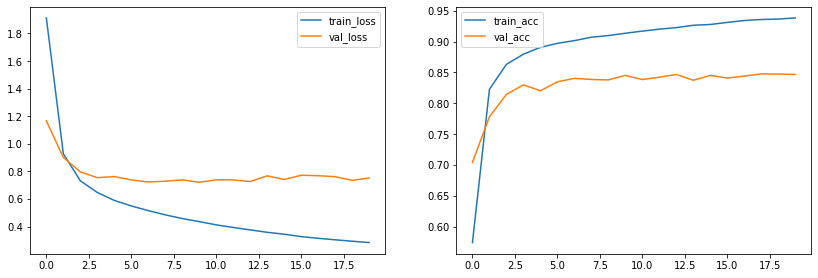

In [6]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Increase Epochs

Epoch 1/100
680/680 [==============================] - 8s 9ms/step - loss: 1.9219 - accuracy: 0.5692 - val_loss: 1.1539 - val_accuracy: 0.7278
Epoch 2/100
680/680 [==============================] - 5s 7ms/step - loss: 0.9375 - accuracy: 0.8177 - val_loss: 0.8760 - val_accuracy: 0.7817
Epoch 3/100
680/680 [==============================] - 5s 7ms/step - loss: 0.7497 - accuracy: 0.8600 - val_loss: 0.7783 - val_accuracy: 0.8218
Epoch 4/100
680/680 [==============================] - 5s 7ms/step - loss: 0.6629 - accuracy: 0.8776 - val_loss: 0.7515 - val_accuracy: 0.8290
Epoch 5/100
680/680 [==============================] - 4s 5ms/step - loss: 0.6046 - accuracy: 0.8876 - val_loss: 0.7573 - val_accuracy: 0.8224
Epoch 6/100
680/680 [==============================] - 4s 5ms/step - loss: 0.5577 - accuracy: 0.8965 - val_loss: 0.7378 - val_accuracy: 0.8388
Epoch 7/100
680/680 [==============================] - 4s 5ms/step - loss: 0.5224 - accuracy: 0.9006 - val_loss: 0.6949 - val_accuracy: 0.8424

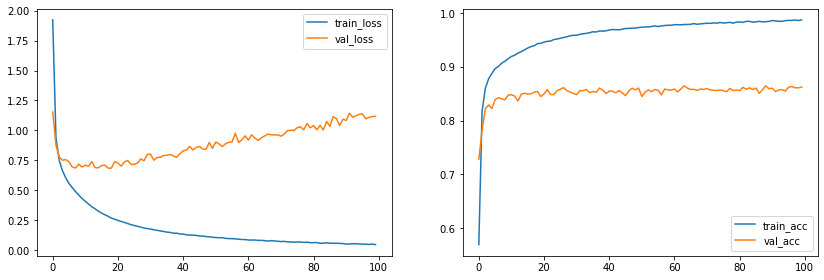

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung an Epochs und Neuronen 
Epochs = 100 
Dense = 86 * 2 = 172

Epoch 1/50
680/680 [==============================] - 8s 7ms/step - loss: 1.5957 - accuracy: 0.6556 - val_loss: 0.9595 - val_accuracy: 0.7530
Epoch 2/50
680/680 [==============================] - 5s 7ms/step - loss: 0.7854 - accuracy: 0.8523 - val_loss: 0.7696 - val_accuracy: 0.8181
Epoch 3/50
680/680 [==============================] - 5s 7ms/step - loss: 0.6369 - accuracy: 0.8813 - val_loss: 0.7206 - val_accuracy: 0.8380
Epoch 4/50
680/680 [==============================] - 4s 6ms/step - loss: 0.5516 - accuracy: 0.8952 - val_loss: 0.7304 - val_accuracy: 0.8377
Epoch 5/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4836 - accuracy: 0.9072 - val_loss: 0.6832 - val_accuracy: 0.8501
Epoch 6/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4258 - accuracy: 0.9163 - val_loss: 0.7140 - val_accuracy: 0.8462
Epoch 7/50
680/680 [==============================] - 4s 7ms/step - loss: 0.3767 - accuracy: 0.9241 - val_loss: 0.6766 - val_accuracy: 0.8448
Epoch 

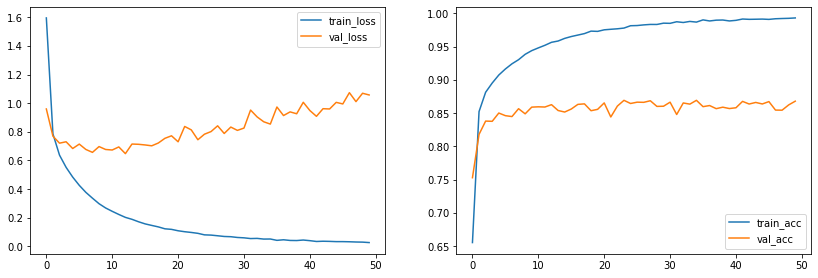

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=50, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss steigt stark -> overfitting

#### Änderungen

Versuch durch mehr Neuronen + Epochs overfitting zu umgehen
Dense = 344 (172*2)
Epoch = 100

Epoch 1/100
680/680 [==============================] - 7s 9ms/step - loss: 1.4104 - accuracy: 0.6930 - val_loss: 0.8695 - val_accuracy: 0.7850
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.6655 - accuracy: 0.8725 - val_loss: 0.7378 - val_accuracy: 0.8158
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.5225 - accuracy: 0.8967 - val_loss: 0.7135 - val_accuracy: 0.8319
Epoch 4/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4231 - accuracy: 0.9153 - val_loss: 0.6961 - val_accuracy: 0.8395
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3514 - accuracy: 0.9279 - val_loss: 0.6419 - val_accuracy: 0.8534
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2935 - accuracy: 0.9383 - val_loss: 0.6074 - val_accuracy: 0.8656
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2511 - accuracy: 0.9459 - val_loss: 0.6648 - val_accuracy: 0.8

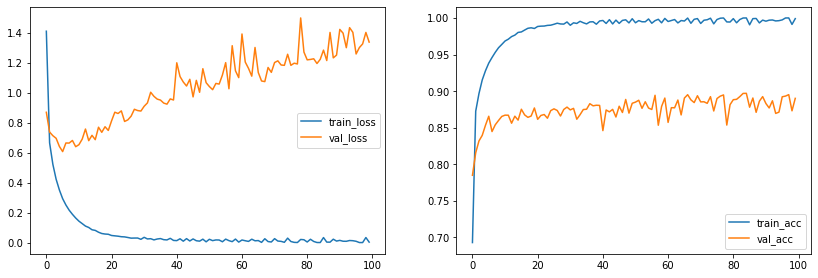

In [8]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Extremes Overfitting -> zu erkennen an dem val_loss Graphen (sollte nach unten verlaufen)

### Dropout
Dropout 0.5  + Decrease Neuronen = 172

Epoch 1/60
680/680 [==============================] - 7s 9ms/step - loss: 2.4874 - accuracy: 0.3372 - val_loss: 1.4120 - val_accuracy: 0.6751
Epoch 2/60
680/680 [==============================] - 6s 8ms/step - loss: 1.5596 - accuracy: 0.5848 - val_loss: 0.9948 - val_accuracy: 0.7781
Epoch 3/60
680/680 [==============================] - 6s 9ms/step - loss: 1.3034 - accuracy: 0.6547 - val_loss: 0.8396 - val_accuracy: 0.8080
Epoch 4/60
680/680 [==============================] - 6s 9ms/step - loss: 1.1692 - accuracy: 0.6898 - val_loss: 0.7593 - val_accuracy: 0.8259
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 1.0893 - accuracy: 0.7087 - val_loss: 0.7188 - val_accuracy: 0.8331
Epoch 6/60
680/680 [==============================] - 6s 10ms/step - loss: 1.0269 - accuracy: 0.7223 - val_loss: 0.6834 - val_accuracy: 0.8417
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 0.9870 - accuracy: 0.7329 - val_loss: 0.6665 - val_accuracy: 0.8474
Epoch

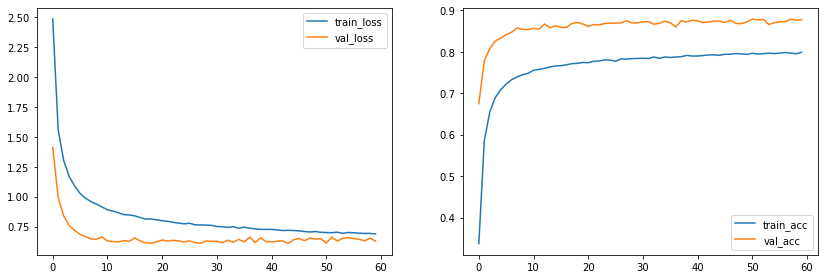

In [10]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Dropout

nun fügen wir einen Dropout dem Netz hinzu und beobachten val_loss und val_accuracy 

Mehr Neuronen (344) dann overfitting?

Epoch 1/100
680/680 [==============================] - 7s 10ms/step - loss: 2.0221 - accuracy: 0.4876 - val_loss: 1.0507 - val_accuracy: 0.7568
Epoch 2/100
680/680 [==============================] - 6s 9ms/step - loss: 1.0628 - accuracy: 0.7456 - val_loss: 0.7699 - val_accuracy: 0.8178
Epoch 3/100
680/680 [==============================] - 7s 10ms/step - loss: 0.8480 - accuracy: 0.7932 - val_loss: 0.6857 - val_accuracy: 0.8409
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.7337 - accuracy: 0.8197 - val_loss: 0.6118 - val_accuracy: 0.8512
Epoch 5/100
680/680 [==============================] - 7s 10ms/step - loss: 0.6646 - accuracy: 0.8331 - val_loss: 0.5758 - val_accuracy: 0.8641
Epoch 6/100
680/680 [==============================] - 7s 11ms/step - loss: 0.6086 - accuracy: 0.8453 - val_loss: 0.5576 - val_accuracy: 0.8733
Epoch 7/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5738 - accuracy: 0.8533 - val_loss: 0.5297 - val_accuracy: 

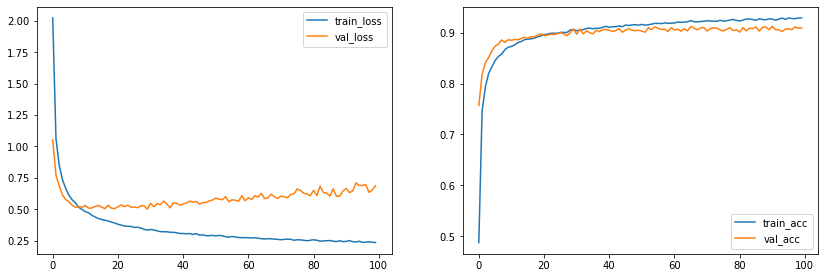

In [9]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung Droprate

Overfitting stark zurückgegangen -> Droprate nochmals anpassen
Droprate auf 0.3

Epoch 1/100
680/680 [==============================] - 7s 8ms/step - loss: 1.6538 - accuracy: 0.6050 - val_loss: 0.8899 - val_accuracy: 0.7892
Epoch 2/100
680/680 [==============================] - 7s 11ms/step - loss: 0.7943 - accuracy: 0.8254 - val_loss: 0.7025 - val_accuracy: 0.8272
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.6021 - accuracy: 0.8645 - val_loss: 0.6427 - val_accuracy: 0.8407
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.5047 - accuracy: 0.8836 - val_loss: 0.5990 - val_accuracy: 0.8550
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4318 - accuracy: 0.8973 - val_loss: 0.5441 - val_accuracy: 0.8746
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3844 - accuracy: 0.9076 - val_loss: 0.5385 - val_accuracy: 0.8773
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3451 - accuracy: 0.9152 - val_loss: 0.5682 - val_accuracy: 0.

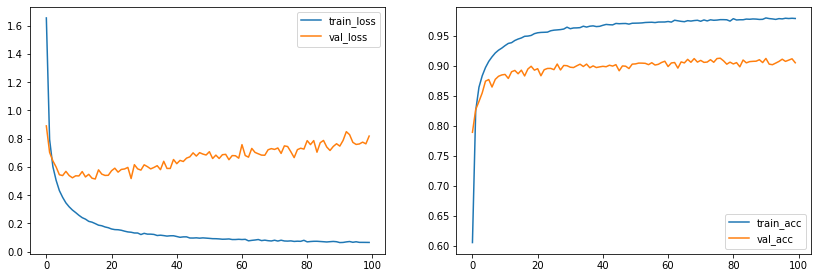

In [5]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray))


#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Droprate 0.3 aber mit weniger neuronen (172)

Epoch 1/60
680/680 [==============================] - 9s 8ms/step - loss: 2.1040 - accuracy: 0.4707 - val_loss: 1.1332 - val_accuracy: 0.7369
Epoch 2/60
680/680 [==============================] - 5s 7ms/step - loss: 1.1305 - accuracy: 0.7320 - val_loss: 0.8136 - val_accuracy: 0.8036
Epoch 3/60
680/680 [==============================] - 6s 10ms/step - loss: 0.8842 - accuracy: 0.7927 - val_loss: 0.7062 - val_accuracy: 0.8349
Epoch 4/60
680/680 [==============================] - 6s 8ms/step - loss: 0.7722 - accuracy: 0.8148 - val_loss: 0.6491 - val_accuracy: 0.8489
Epoch 5/60
680/680 [==============================] - 6s 8ms/step - loss: 0.6968 - accuracy: 0.8304 - val_loss: 0.6326 - val_accuracy: 0.8500
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 0.6400 - accuracy: 0.8422 - val_loss: 0.6027 - val_accuracy: 0.8595
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5976 - accuracy: 0.8508 - val_loss: 0.5904 - val_accuracy: 0.8607
Epoch

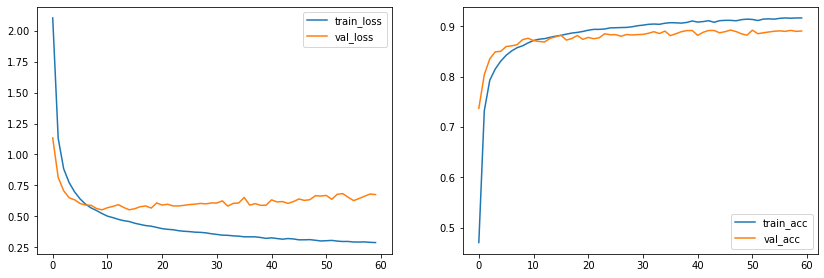

In [12]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray))


#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Epochs auf 60 reduzieren, genug aussagekraft basierend auf vorherigen Ergebnissen

val_loss stieg auch, daher Droprate wieder erhöhen

Droprate 0,4

Epoch = 60

### Dropoutanpassung 
Dropout 0,4 aber mit Neuronen = 172

Epoch 1/60
680/680 [==============================] - 8s 10ms/step - loss: 2.2008 - accuracy: 0.4360 - val_loss: 1.1939 - val_accuracy: 0.7352
Epoch 2/60
680/680 [==============================] - 6s 8ms/step - loss: 1.2222 - accuracy: 0.6972 - val_loss: 0.8362 - val_accuracy: 0.7895
Epoch 3/60
680/680 [==============================] - 6s 8ms/step - loss: 0.9839 - accuracy: 0.7566 - val_loss: 0.7449 - val_accuracy: 0.8180
Epoch 4/60
680/680 [==============================] - 6s 9ms/step - loss: 0.8641 - accuracy: 0.7847 - val_loss: 0.6777 - val_accuracy: 0.8418
Epoch 5/60
680/680 [==============================] - 6s 9ms/step - loss: 0.7902 - accuracy: 0.8012 - val_loss: 0.6455 - val_accuracy: 0.8514
Epoch 6/60
680/680 [==============================] - 6s 8ms/step - loss: 0.7363 - accuracy: 0.8131 - val_loss: 0.5974 - val_accuracy: 0.8615
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 0.6991 - accuracy: 0.8212 - val_loss: 0.6059 - val_accuracy: 0.8581
Epoch

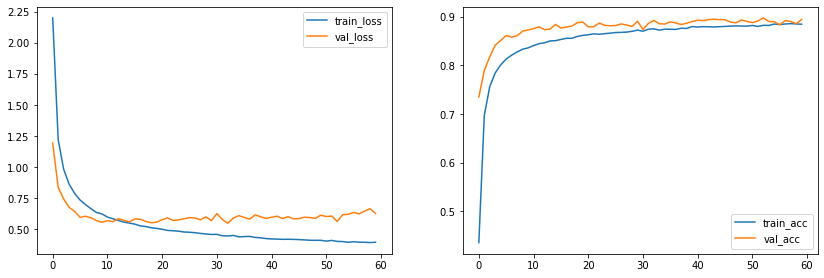

In [13]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Auswertung:

Overfitting geringer als bei Dropout = 0.3 -> Dropout = 0.4 beibehalten

Test mit Neuronen = 120

Epoch 1/120
680/680 [==============================] - 6s 6ms/step - loss: 2.5484 - accuracy: 0.3278 - val_loss: 1.4291 - val_accuracy: 0.6710
Epoch 2/120
680/680 [==============================] - 4s 5ms/step - loss: 1.5724 - accuracy: 0.5863 - val_loss: 1.0388 - val_accuracy: 0.7675
Epoch 3/120
680/680 [==============================] - 4s 5ms/step - loss: 1.3181 - accuracy: 0.6541 - val_loss: 0.8687 - val_accuracy: 0.7990
Epoch 4/120
680/680 [==============================] - 4s 5ms/step - loss: 1.1836 - accuracy: 0.6879 - val_loss: 0.7774 - val_accuracy: 0.8184
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 1.1128 - accuracy: 0.7026 - val_loss: 0.7374 - val_accuracy: 0.8245
Epoch 6/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0524 - accuracy: 0.7138 - val_loss: 0.7185 - val_accuracy: 0.8298
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0178 - accuracy: 0.7233 - val_loss: 0.7019 - val_accuracy: 0.8330

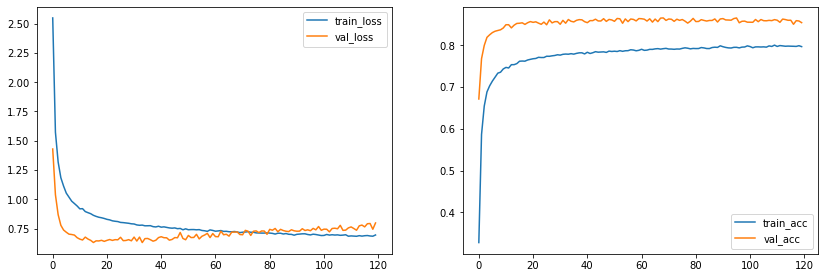

In [22]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Neuronen auf 145 Dropout  = 0.4

Epoch 1/120
680/680 [==============================] - 12s 16ms/step - loss: 2.4081 - accuracy: 0.3659 - val_loss: 1.3636 - val_accuracy: 0.6886
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 1.4438 - accuracy: 0.6292 - val_loss: 0.9837 - val_accuracy: 0.7751
Epoch 3/120
680/680 [==============================] - 4s 6ms/step - loss: 1.1798 - accuracy: 0.6954 - val_loss: 0.8320 - val_accuracy: 0.8070
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 1.0580 - accuracy: 0.7265 - val_loss: 0.7476 - val_accuracy: 0.8228
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 0.9739 - accuracy: 0.7475 - val_loss: 0.7255 - val_accuracy: 0.8351
Epoch 6/120
680/680 [==============================] - 4s 6ms/step - loss: 0.9215 - accuracy: 0.7561 - val_loss: 0.6855 - val_accuracy: 0.8443
Epoch 7/120
680/680 [==============================] - 4s 6ms/step - loss: 0.8742 - accuracy: 0.7695 - val_loss: 0.6534 - val_accuracy: 0.84

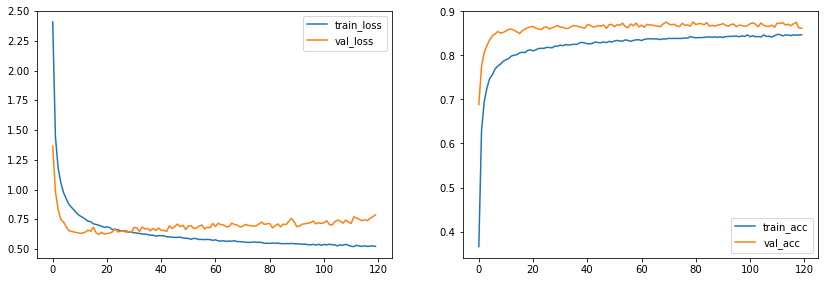

In [21]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(145, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Neuronen = 120 + Dropout = 0.4 bestes ergebnis

# Vergleich von versch. Aktivierungsfunktionen

Aktivierungsfunktion sigmoid

Epoch 1/120
680/680 [==============================] - 5s 6ms/step - loss: 2.5361 - accuracy: 0.3668 - val_loss: 1.4966 - val_accuracy: 0.6631
Epoch 2/120
680/680 [==============================] - 4s 5ms/step - loss: 1.3511 - accuracy: 0.6725 - val_loss: 0.9778 - val_accuracy: 0.7737
Epoch 3/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0147 - accuracy: 0.7576 - val_loss: 0.7952 - val_accuracy: 0.8078
Epoch 4/120
680/680 [==============================] - 4s 5ms/step - loss: 0.8503 - accuracy: 0.7957 - val_loss: 0.6914 - val_accuracy: 0.8369
Epoch 5/120
680/680 [==============================] - 4s 5ms/step - loss: 0.7500 - accuracy: 0.8198 - val_loss: 0.6442 - val_accuracy: 0.8471
Epoch 6/120
680/680 [==============================] - 4s 5ms/step - loss: 0.6777 - accuracy: 0.8349 - val_loss: 0.6036 - val_accuracy: 0.8543
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 0.6268 - accuracy: 0.8459 - val_loss: 0.5798 - val_accuracy: 0.8638

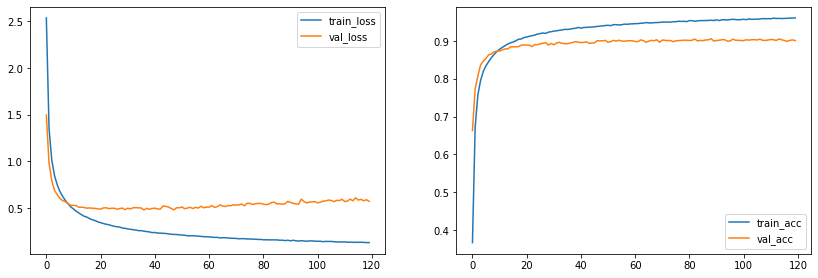

In [20]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Schlechter als relu 

val_loss: 0.4491 - val_accuracy: 0.9108

### Vergleich mit Aktivierungsfunktion GELU

In [ ]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss + val_acc besser als relu

# Vergleich von versch. Optimizern

initial = adam

adagrad

adadelta

Epoch 1/120
680/680 [==============================] - 6s 7ms/step - loss: 3.7267 - accuracy: 0.0441 - val_loss: 3.6255 - val_accuracy: 0.0854
Epoch 2/120
680/680 [==============================] - 5s 8ms/step - loss: 3.5949 - accuracy: 0.0885 - val_loss: 3.5087 - val_accuracy: 0.1599
Epoch 3/120
680/680 [==============================] - 6s 10ms/step - loss: 3.4823 - accuracy: 0.1241 - val_loss: 3.3816 - val_accuracy: 0.2356
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 3.3636 - accuracy: 0.1604 - val_loss: 3.2547 - val_accuracy: 0.2848
Epoch 5/120
680/680 [==============================] - 4s 5ms/step - loss: 3.2527 - accuracy: 0.1907 - val_loss: 3.1322 - val_accuracy: 0.3310
Epoch 6/120
680/680 [==============================] - 4s 5ms/step - loss: 3.1413 - accuracy: 0.2239 - val_loss: 3.0248 - val_accuracy: 0.3614
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 3.0430 - accuracy: 0.2513 - val_loss: 2.9136 - val_accuracy: 0.387

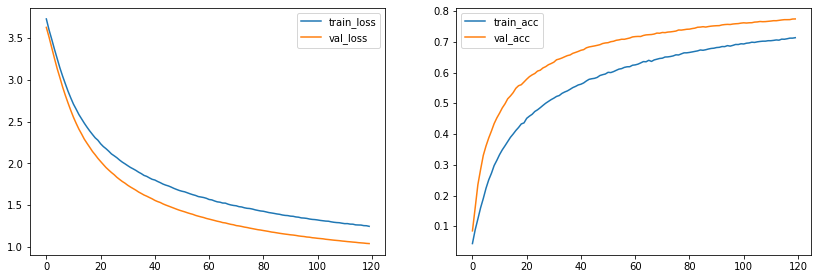

In [23]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Zum Vergleich nun Optimizer wieder ändern

optimizer = adadelta

Epoch 1/120
680/680 [==============================] - 5s 6ms/step - loss: 3.9588 - accuracy: 0.0212 - val_loss: 3.8444 - val_accuracy: 0.0150
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 3.8574 - accuracy: 0.0237 - val_loss: 3.7881 - val_accuracy: 0.0185
Epoch 3/120
680/680 [==============================] - 4s 6ms/step - loss: 3.8015 - accuracy: 0.0266 - val_loss: 3.7596 - val_accuracy: 0.0245
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 3.7703 - accuracy: 0.0303 - val_loss: 3.7404 - val_accuracy: 0.0282
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 3.7504 - accuracy: 0.0340 - val_loss: 3.7271 - val_accuracy: 0.0319
Epoch 6/120
680/680 [==============================] - 4s 6ms/step - loss: 3.7358 - accuracy: 0.0389 - val_loss: 3.7173 - val_accuracy: 0.0348
Epoch 7/120
680/680 [==============================] - 4s 6ms/step - loss: 3.7258 - accuracy: 0.0418 - val_loss: 3.7083 - val_accuracy: 0.0392

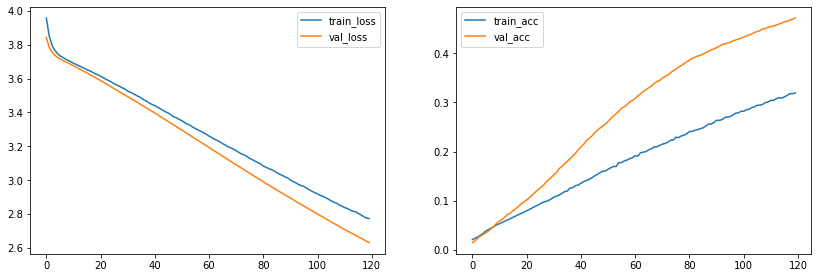

In [24]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Letzte Anpassungen

Dense = 788

Epochs = 100

optimizer= adam

Epoch 1/100
680/680 [==============================] - 11s 15ms/step - loss: 1.5161 - accuracy: 0.6356 - val_loss: 0.8549 - val_accuracy: 0.7866
Epoch 2/100
680/680 [==============================] - 11s 17ms/step - loss: 0.7200 - accuracy: 0.8396 - val_loss: 0.6364 - val_accuracy: 0.8380
Epoch 3/100
680/680 [==============================] - 12s 18ms/step - loss: 0.5436 - accuracy: 0.8734 - val_loss: 0.5763 - val_accuracy: 0.8609
Epoch 4/100
680/680 [==============================] - 12s 18ms/step - loss: 0.4435 - accuracy: 0.8943 - val_loss: 0.5522 - val_accuracy: 0.8645
Epoch 5/100
680/680 [==============================] - 12s 17ms/step - loss: 0.3859 - accuracy: 0.9064 - val_loss: 0.5488 - val_accuracy: 0.8638
Epoch 6/100
680/680 [==============================] - 12s 17ms/step - loss: 0.3375 - accuracy: 0.9173 - val_loss: 0.6042 - val_accuracy: 0.8515
Epoch 7/100
680/680 [==============================] - 12s 17ms/step - loss: 0.3053 - accuracy: 0.9238 - val_loss: 0.5250 - val_ac

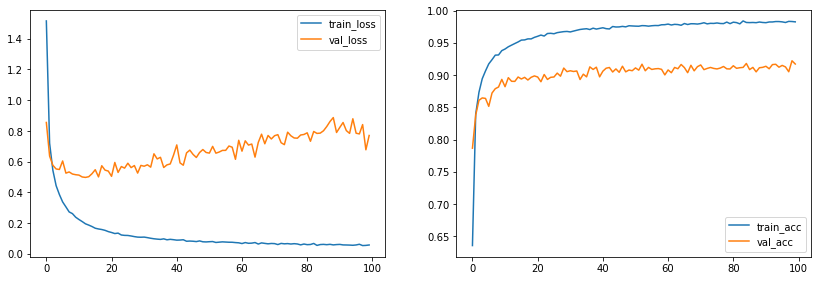

In [6]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(788, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
#   early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### val_loss increases not needed more epochs than 60 (Overfitting)